<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Sklearn_Logistic_Regression_Mnist_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [12]:
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preperation

In [2]:
len(mnist['data'])

70000

In [3]:
X,y = mnist['data'],mnist['target']

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [10]:
y = y.astype('int')

In [11]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [13]:
def viz(n):
  plt.imshow(X[n].reshape(28,28))
  return

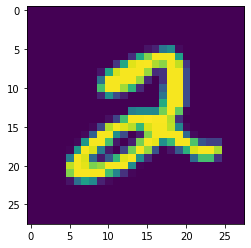

In [14]:
viz(5)

Finding certain numbers in target dataset:

In [15]:
np.where(y==9)

(array([    4,    19,    22, ..., 69945, 69973, 69992]),)

Above arrays shows where number 9 stored in y

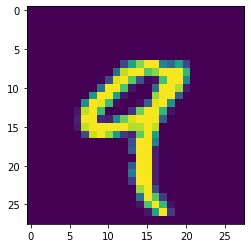

In [17]:
viz(4)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=True,random_state=42)

## Binary Classification (Zero-non zero)

In [20]:
y_train_0 = (y_train == 0)

In [22]:
 from sklearn.linear_model import SGDClassifier

## SGD Training

In [23]:
model_1 = SGDClassifier(random_state = 0)
model_1.fit(X_train,y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## Prediction

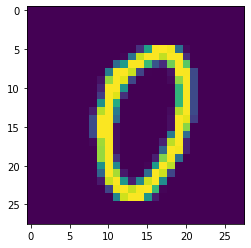

In [24]:
viz(1000)

In [25]:
model_1.predict(X[1000].reshape(1,-1))

array([ True])

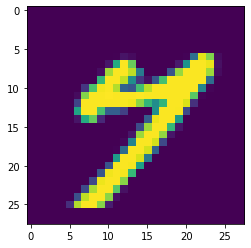

In [26]:
viz(1001)

In [27]:
model_1.predict(X[1001].reshape(1,-1))

array([False])